## Problem Statement

* Plot a bar chart showing count of individual species? 
* Identify outliers and remove if any? 
* Build a regression model and print regression equation? 
* What is the mean score of the model at 95% confidence interval? 
* Compare real and predicted weights and give a conclusion statement based on it? 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import os


## Load File and Explore Data

In [2]:
os.chdir("C:/Users/vishw/OneDrive/Documents/Imarticus/Python/Machine Learning")

In [3]:
fishh = pd.read_csv("Fish_dataset.csv")

In [4]:
# creating copy of original dataset
fish = fishh.copy()

In [5]:
# Display first 5 records
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
# Display columns in the dataset
fish.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [7]:
# Display Information about the data
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
# Display 'n' of columns and rows
fish.shape

(159, 7)

In [9]:
## Display NULL's in the dataset
fish.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [10]:
fish["Weight"].min()

0.0

In [11]:
# There is 'Weight' 0.0 however we replace it with median.

fish.replace(0.0, np.nan, inplace=True)

In [12]:
fish["Weight"].median()

281.5

In [13]:
fish["Weight"].replace(np.nan, 281.5, inplace=True)

In [14]:
# Creating a list of Numeric columns
numeric_columns = fish.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [15]:
# Creating a list of Category columns
category_columns = fish.select_dtypes(include=object).columns.tolist()

# Checking for sub-categories count

for column in category_columns:
    print(fish[column].value_counts())

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


In [16]:
# Display five point Summary of the dataset
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,400.096855,26.247170,28.415723,31.227044,8.970994,4.417486
std,356.689642,9.996441,10.716328,11.610246,4.286208,1.685804
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,122.500000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,281.500000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [17]:
# Display summary of categorical dataset
fish.describe(include=object)

,Species
count,159
unique,7
top,Perch
freq,56


# Bar chart showing count of each species 

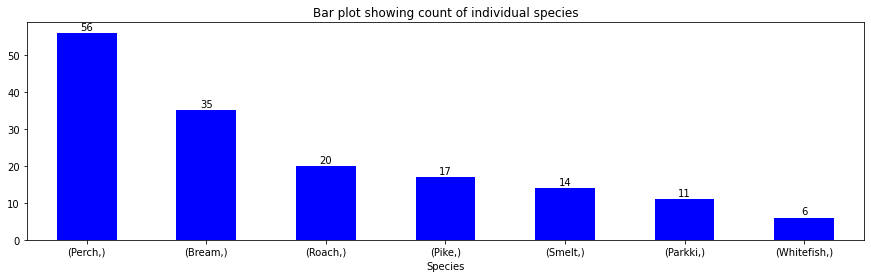

In [18]:
species = fish[category_columns].value_counts()
plt.figure(figsize=(15,4))
ax = species.plot(kind='bar', rot=0, color="b")
ax.set_title('Bar plot showing count of individual species', y = 1)


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

## Identify outliers and remove if any

In [19]:
# Capping of Outlier

def Outliers_Removal(numeric_columns):
    Q1=fish[numeric_columns].quantile(0.25)
    Q3=fish[numeric_columns].quantile(0.75)
    IQR=Q3-Q1
    LW= Q1-1.5*IQR
    RW= Q3+1.5*IQR
    fish[numeric_columns]=np.clip(fish[numeric_columns], LW, RW)

In [20]:
for var in numeric_columns:
    Outliers_Removal(var)

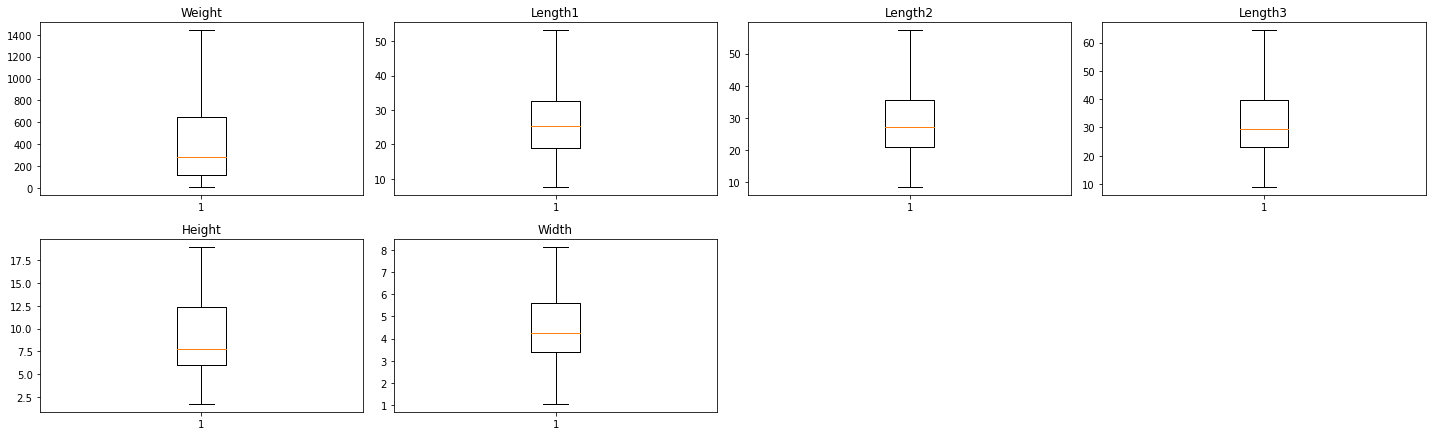

In [21]:
# Check for Outlier detection

plt.figure(figsize=(20,30))

for i, variable in enumerate (numeric_columns):
    plt.subplot(10,4, i+1)
    plt.boxplot(fish[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

# Linear Regression Model

In [22]:
# Defining Dependent and Independent Variable

X = fish.drop(["Weight"], axis=1)
Y = fish[["Weight"]]

In [23]:
# Creating Dummy Variables for category_columns

X = pd.get_dummies(X, columns=category_columns, drop_first=True)

In [24]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state =42)

In [25]:
# Model fitting

from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(X_train, Y_train)

LinearRegression()

In [26]:
# Intercept and Coefficient of Linear Equation

print("Intercept of te Linear Equation:", ln.intercept_)
print("Coeff of the Linear Equation:", ln.coef_)

Intercept of te Linear Equation: [-1012.22592026]
Coeff of the Linear Equation: [[-44.09738845 -22.69214972  87.39179286  12.98846256  27.75905957
  267.00535246 344.18767271  83.49731722 225.22325516 566.88767651
  231.54899587]]


In [27]:
# Predicting values from Model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pred_train = ln.predict(X_train)
pred_test = ln.predict(X_test)

# Mean Absolute Error

In [28]:
print("Train MAE:",mean_absolute_error(Y_train, pred_train))
print("Test MAE:",mean_absolute_error(Y_test, pred_test))

Train MAE: 66.65635426764577
Test MAE: 59.40723923431424


# Root Mean Squared Error

In [49]:
# Helps to find over fitting and underfitting - difference should be minimum

print("Train RMSE:",mean_squared_error(Y_train, pred_train)**0.5)
print("Test RMSE:",mean_squared_error(Y_test, pred_test)**0.5)

Train RMSE: 85.71931386846443
Test RMSE: 77.0518667006512


# R Square for Training Data

In [30]:
print ("R Squared Train:",r2_score(Y_train, pred_train))

R Squared Train: 0.9379609241097878


In [31]:
# R Square for Test Data
print("R Squared Test:", r2_score(Y_test, pred_test))

R Squared Test: 0.9515323379385672


# Mean Abosolute Percentage Error

In [32]:
from sklearn.metrics import mean_absolute_percentage_error
print ("Train MAPE:",mean_absolute_percentage_error(Y_train, pred_train))

Train MAPE: 1.0950894116005132


In [33]:
from sklearn.metrics import mean_absolute_percentage_error
print ("Test MAPE:",mean_absolute_percentage_error(Y_test, pred_test))

Test MAPE: 0.9726419439495168


# Comparison of Predicted values with Actual Values using Distribution Plot

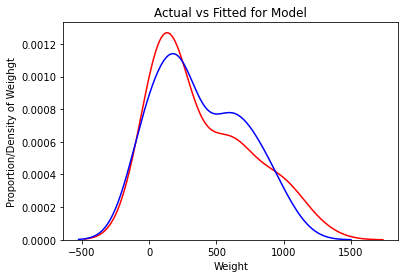

In [34]:
ax1 = sns.distplot(Y_test, hist=False, color="r", label = "Actual Values")
sns.distplot(pred_test, hist=False, color="b", label = "Fitted Values", ax=ax1)
plt.title("Actual vs Fitted for Model")
plt.xlabel("Weight")
plt.ylabel("Proportion/Density of Weighgt")
plt.show()

# Intepretation
* The difference between the actual value or observed value and the predicted value is called the residual in regression analysis
* In the above drawn graph red line shows actual weight and Blue line shows predicted value of the model and it predicts closer to the actual value
* Root Mean Squared Error of train and test data are not different, indicating that our model is not overfitting the train data.
* Mean Absolute Error indicates that our current model is able to predict weight of fishes within mean error of 59 on test data.
* The units of both RMSE and MAE are the same. But RMSE is greater than MAE because it panalises the outliers more.
* Mean Absolute Percentage Error is 0.97 on the test data.

## The mean score of the model at 95% confidence interval

In [41]:
import scipy.stats as stats

In [42]:
fish.mean()

Weight     397.101572
Length1     26.175000
Length2     28.342453
Length3     31.204403
Height       8.970994
Width        4.417486
dtype: float64

In [46]:
confidence = 0.95
s = (pred_test - Y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(s) - 1, loc=s.mean(),
    scale=stats.sem(s)))

array([[57.05774972],
       [92.8353032 ]])

In [50]:
st.norm.interval(alpha=0.95, loc=np.mean(pred_test), scale=st.sem(pred_test))

(array([284.64032498]), array([466.22915768]))

In [51]:
st.norm.interval(alpha=0.95, loc=np.mean(Y_test), scale=st.sem(Y_test))

(array([291.8368027]), array([491.95486396]))